<center>
<img src="../../img/attrition.jpg" />

#### <div style="text-align: right">Author: Pisarev Ivan, ODS Slack: pisarev_i</div>
## <center> Predict attrition of employees  

### 1. Feature and data explanation

> *People are definitely a company's greatest asset.  
    It doesn't make any difference whether the product is cars or cosmetics.  
    A company is only as good as the people it keeps.*  
> ***Mary Kay Ash***  

There is no doubt about the fact that the human asset is the key intangible asset for any organization. In today’s dynamic and continuously changing business world, it is the human assets and not the fixed or tangible assets that differentiate an organization from its competitors. Today’s knowledge economy distinguishes one organization from another with the single most important and powerful factor that is the Human Resources (HR) or Human Assets.

Employees leaving an organization might be replaced physically; however, their skill-sets and knowledge cannot be exactly replaced by the person replacing them, as each individual possesses a different skill-set and experience. Employee efficiency and talent determines the pace and growth of the organizations.

There are two important business issues:
  -  Uncover the factors that lead to employee attrition
  -  Prediction valuable employees who are ready to attrition

To get answers to these questions, we will analyze dataset <a href="https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home" target=__blank>IBM HR Analytics Employee Attrition & Performance</a>

This is a fictional data set created by IBM data scientists.  
List of columns with their types:
  -  **Age** - Numeric Discrete
  -  **Attrition** - Caregorical
  -  **BusinessTravel** - Caregorical
  -  **DailyRate** - Numeric Discrete
  -  **Department** - Caregorical
  -  **DistanceFromHome** - Numeric Discrete
  -  **Education** - Caregorical (1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor')
  -  **EducationField** - Caregorical
  -  **EmployeeCount** - Numeric Discrete
  -  **EmployeeNumber** - Numeric Discrete
  -  **EnvironmentSatisfaction** - Caregorical (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High')
  -  **Gender** - Caregorical
  -  **HourlyRate** - Numeric Discrete
  -  **JobInvolvement** - Caregorical (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High')
  -  **JobLevel** - Caregorical
  -  **JobRole** - Caregorical
  -  **JobSatisfaction** - Caregorical (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High')
  -  **MaritalStatus** - Caregorical
  -  **MonthlyIncome** - Numeric Discrete
  -  **MonthlyRate** - Numeric Discrete
  -  **NumCompaniesWorked** - Numeric Discrete
  -  **Over18** - Caregorical
  -  **OverTime** - Caregorical
  -  **PercentSalaryHike** - Numeric Discrete
  -  **PerformanceRating** - Caregorical (1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding')
  -  **RelationshipSatisfaction** - Caregorical (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High')
  -  **StandardHours** - Numeric Discrete
  -  **StockOptionLevel** - Caregorical
  -  **TotalWorkingYears** - Numeric Discrete
  -  **TrainingTimesLastYear** - Numeric Discrete
  -  **WorkLifeBalance** - Caregorical (1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best')
  -  **YearsAtCompany** - Numeric Discrete
  -  **YearsInCurrentRole** - Numeric Discrete
  -  **YearsSinceLastPromotion** - Numeric Discrete
  -  **YearsWithCurrManager** - Numeric Discrete

The target feature **Attrition** has two possible values: 'Yes' and 'No', so our task is binary classification.  
It is also important to understand the significance of features.  

### 2. Primary data analysis

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

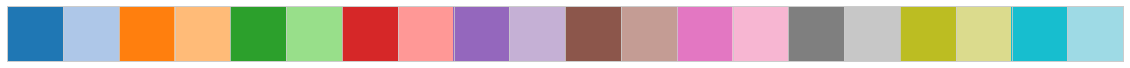

In [3]:
color = sns.color_palette('tab20')
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,8)
sns.palplot(color)

Let's get the data, look at the first lines, check types and omissions

In [278]:
dfIBM = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [279]:
dfIBM.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [280]:
dfIBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

There are **no missing items** in the data.  
Let's check the distribution of features values.

In [281]:
dfIBM.describe(include=['int64']).T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [282]:
dfIBM.describe(include=['object']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


We can check count of unique values for all features

In [283]:
pd.concat([pd.DataFrame({'Unique Values': dfIBM.nunique().sort_values()}),
           pd.DataFrame({'Type': dfIBM.dtypes})], axis=1, sort=False).sort_values(by='Unique Values')

,Unique Values,Type
Over18,1,object
StandardHours,1,int64
EmployeeCount,1,int64
Gender,2,object
Attrition,2,object
PerformanceRating,2,int64
OverTime,2,object
MaritalStatus,3,object
Department,3,object
BusinessTravel,3,object


There are three columns with **constant** values. These columns do not make sense, we can **remove them**.

In [284]:
dfIBM.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

Let's check balance in values of target feature

In [285]:
round(dfIBM['Attrition'].value_counts(normalize=True)*100, 2)

No     83.88
Yes    16.12
Name: Attrition, dtype: float64

We can see **imbalance** in target class, there much more values 'No' than 'Yes'.  
Let's convert target feature to numeric.

In [286]:
dfIBM.Attrition = dfIBM.Attrition.map({'Yes': 1, 'No': 0})

Column `EmployeeNumber` has all unique values (1470). We can suppose that it is like employee identificaton number. Let's check it is not affected to target feature.

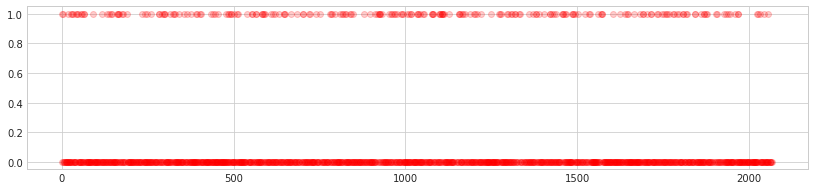

In [287]:
plt.rcParams['figure.figsize'] = (14,3)
plt.plot(dfIBM.EmployeeNumber, dfIBM.Attrition, 'ro', alpha=0.2);

Ok, there is no leak in the data and `Attrition` not sorted by `EmployeeNumber`. We can **remove this column** from the dataset.

In [288]:
dfIBM.drop(columns=['EmployeeNumber'], axis=1, inplace=True)

Now, looking at the variable names and their values, we can classify all variables into 3 types.  

  <table align="left">
    <tr><th>Name</th><th>Unique Values</th><th>Type</th></tr>
    <tr><th colspan="3">Categorical, order has no sense</th></tr>
        <tr><td>BusinessTravel</td><td>3</td><td>object</td></tr>
        <tr><td>Department</td><td>3</td><td>object</td></tr>
        <tr><td>EducationField</td><td>6</td><td>object</td></tr>
        <tr><td>EmployeeNumber</td><td>1470</td><td>int64</td></tr>
        <tr><td>Gender</td><td>2</td><td>object</td></tr>
        <tr><td>JobRole</td><td>9</td><td>object</td></tr>
        <tr><td>MaritalStatus</td><td>3</td><td>object</td></tr>
        <tr><td>OverTime</td><td>2</td><td>object</td></tr>
    <tr><th colspan="3">Categorical, order has sense, but distance between values has no sense</th></tr>
        <tr><td>Education</td><td>5</td><td>int64</td></tr>
        <tr><td>EnvironmentSatisfaction</td><td>4</td><td>int64</td></tr>
        <tr><td>JobInvolvement</td><td>4</td><td>int64</td></tr>
        <tr><td>JobLevel</td><td>5</td><td>int64</td></tr>
        <tr><td>JobSatisfaction</td><td>4</td><td>int64</td></tr>
        <tr><td>PerformanceRating</td><td>2</td><td>int64</td></tr>
        <tr><td>RelationshipSatisfaction</td><td>4</td><td>int64</td></tr>
        <tr><td>StockOptionLevel</td><td>4</td><td>int64</td></tr>
        <tr><td>WorkLifeBalance</td><td>4</td><td>int64</td></tr>
    <tr><th colspan="3">Numeric, discrete</th></tr>
        <tr><td>Age</td><td>43</td><td>int64</td></tr>
        <tr><td>DailyRate</td><td>886</td><td>int64</td></tr>
        <tr><td>DistanceFromHome</td><td>29</td><td>int64</td></tr>
        <tr><td>HourlyRate</td><td>71</td><td>int64</td></tr>
        <tr><td>MonthlyIncome</td><td>1349</td><td>int64</td></tr>
        <tr><td>MonthlyRate</td><td>1427</td><td>int64</td></tr>
        <tr><td>NumCompaniesWorked</td><td>10</td><td>int64</td></tr>
        <tr><td>PercentSalaryHike</td><td>15</td><td>int64</td></tr>
        <tr><td>TotalWorkingYears</td><td>40</td><td>int64</td></tr>
        <tr><td>TrainingTimesLastYear</td><td>7</td><td>int64</td></tr>
        <tr><td>YearsAtCompany</td><td>37</td><td>int64</td></tr>
        <tr><td>YearsInCurrentRole</td><td>19</td><td>int64</td></tr>
        <tr><td>YearsSinceLastPromotion</td><td>16</td><td>int64</td></tr>
        <tr><td>YearsWithCurrManager</td><td>18</td><td>int64</td></tr>
    </table>

In [289]:
Categorical_without_order = ['BusinessTravel', 'Department', 'EducationField',
                             'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Categorical_with_order = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                          'JobLevel', 'JobSatisfaction', 'PerformanceRating',
                          'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

Numeric = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
           'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
           'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
           'YearsWithCurrManager']

### 3. Primary visual data analysis

Let's see distribution of all features and the dependence of the target variable.

In [59]:
dictCatNames = {'Education': ['Below College','College','Bachelor','Master','Doctor'],
                'EnvironmentSatisfaction': ['Low','Medium','High','Very High'],
                'JobInvolvement': ['Low','Medium','High','Very High'],
                'JobSatisfaction': ['Low','Medium','High','Very High'],
                'PerformanceRating': ['Low','Good','Excellent','Outstanding'],
                'RelationshipSatisfaction':['Low','Medium','High','Very High'],
                'WorkLifeBalance': ['Bad','Good','Better','Best']}

In [60]:
def cat_distribution_target_proportion(column):
    fig , axes = plt.subplots(1,2,figsize = (15,6))
    fig.suptitle(column,fontsize=16)
    
    sns.countplot(dfIBM[column],ax=axes[0])
    axes[0].set_title(column + ' distribution')
    
    sns.barplot(x=column,y='Attrition',data=dfIBM,ax=axes[1])
    axes[1].set_title('Attrition rate by '+column)
    
    for ax in axes:
        if column in dictCatNames:
            ax.xaxis.set_ticklabels(dictCatNames[column])
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')

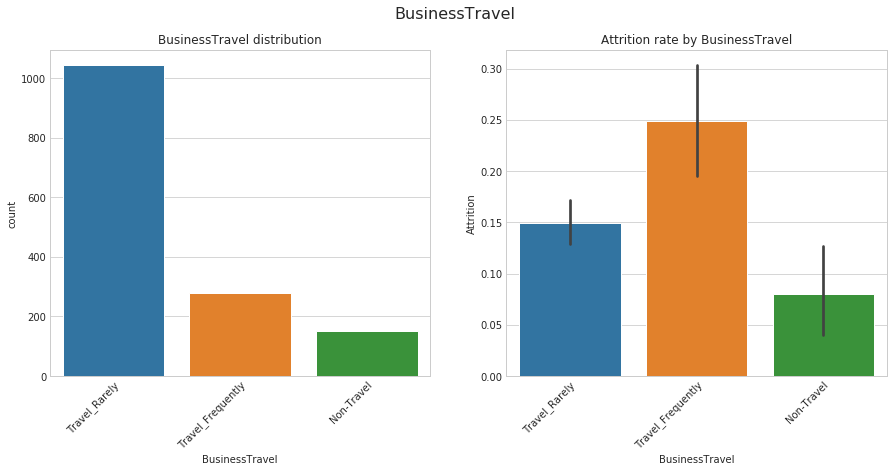

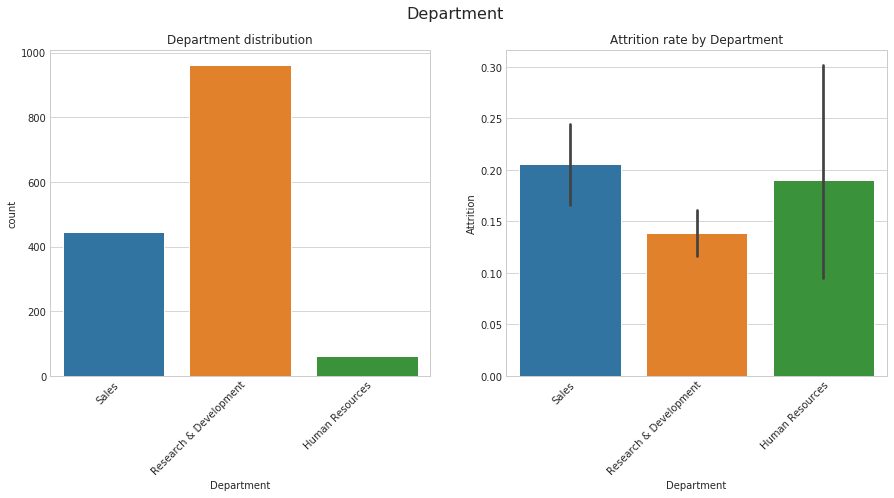

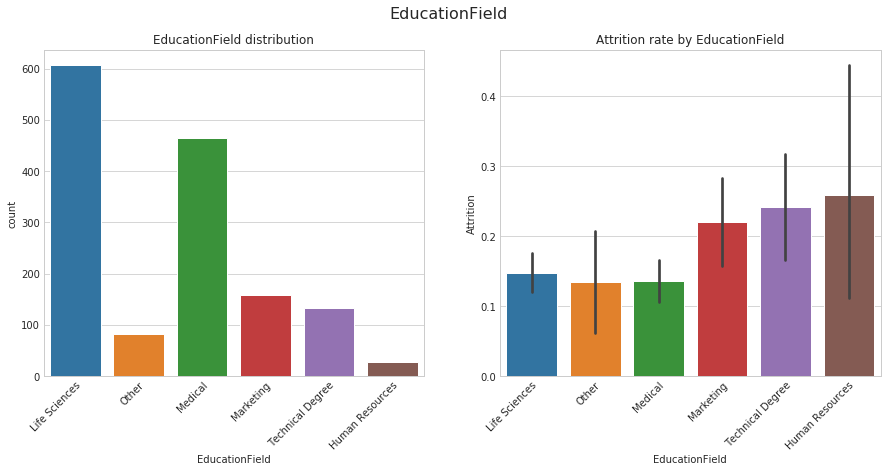

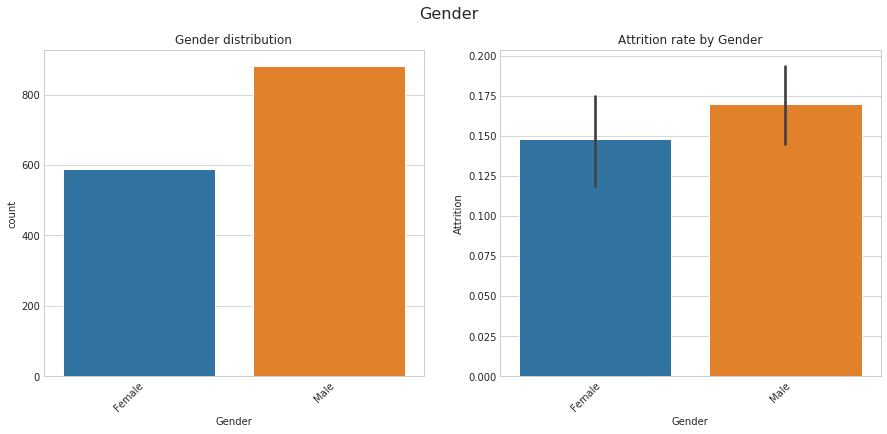

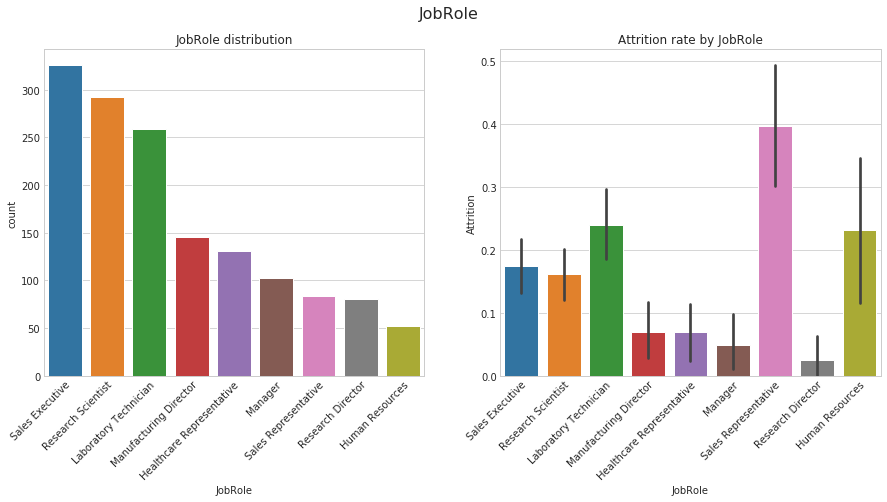

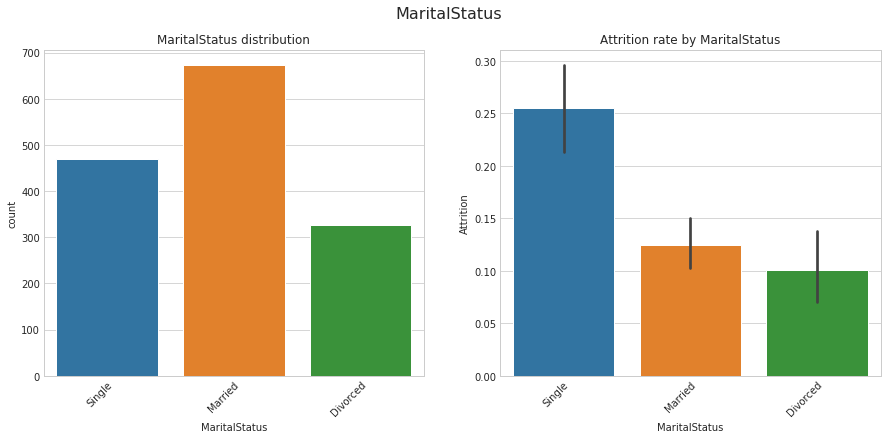

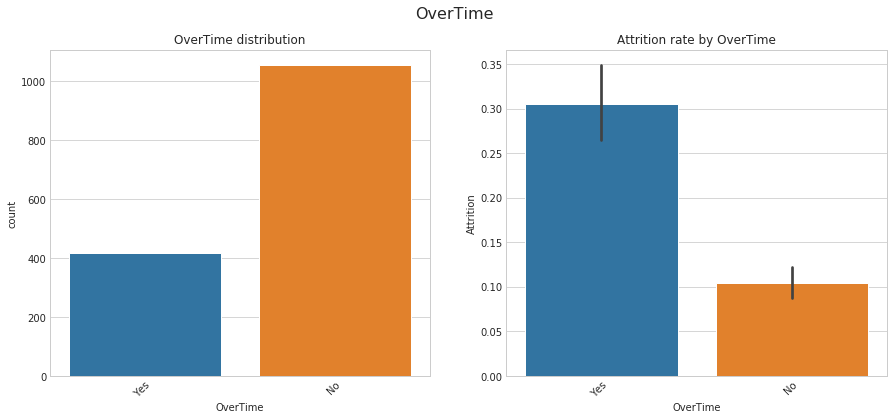

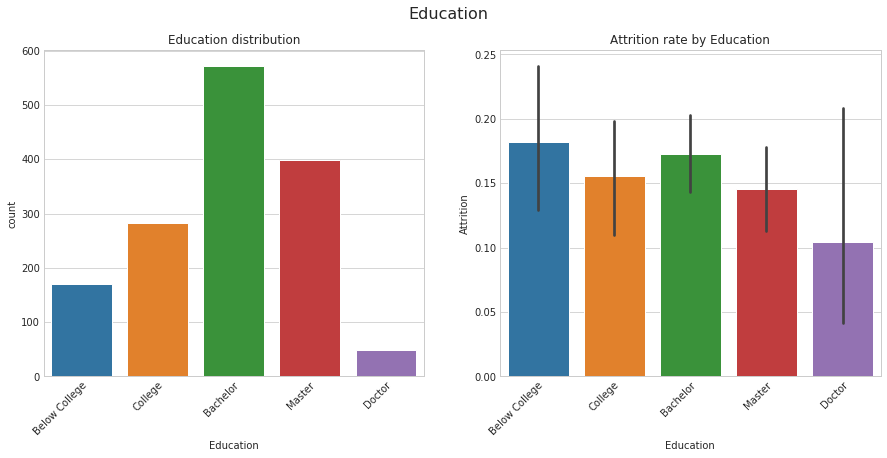

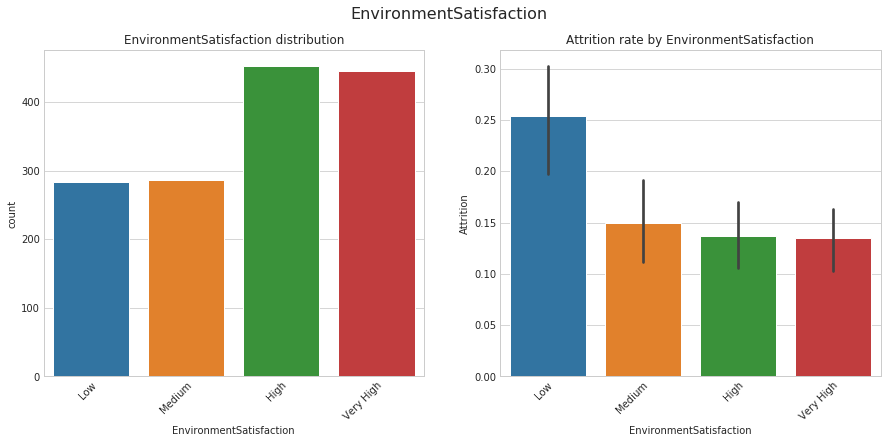

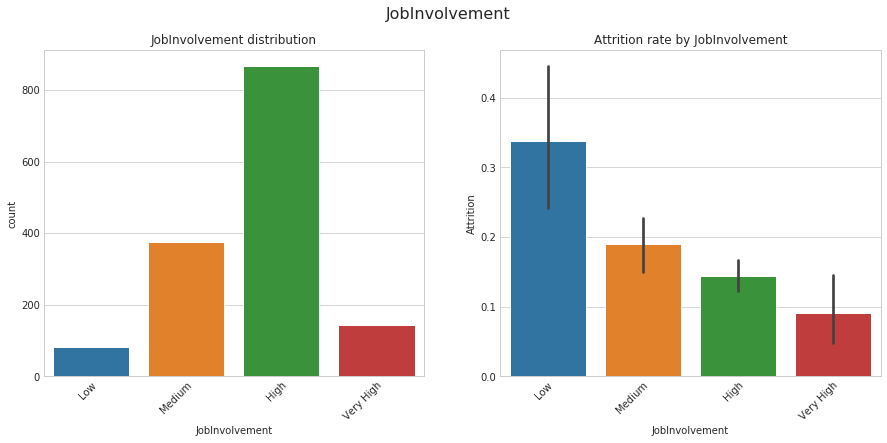

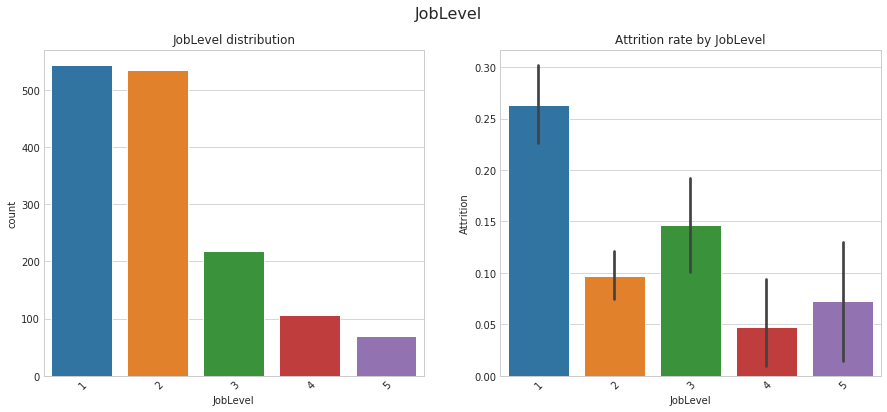

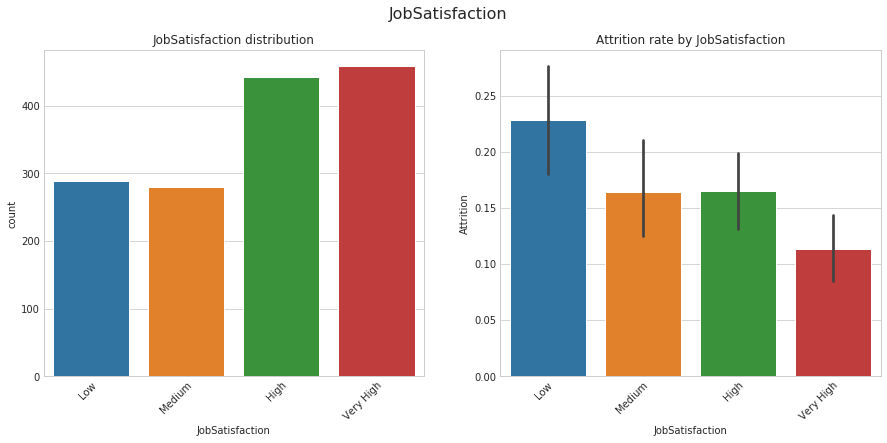

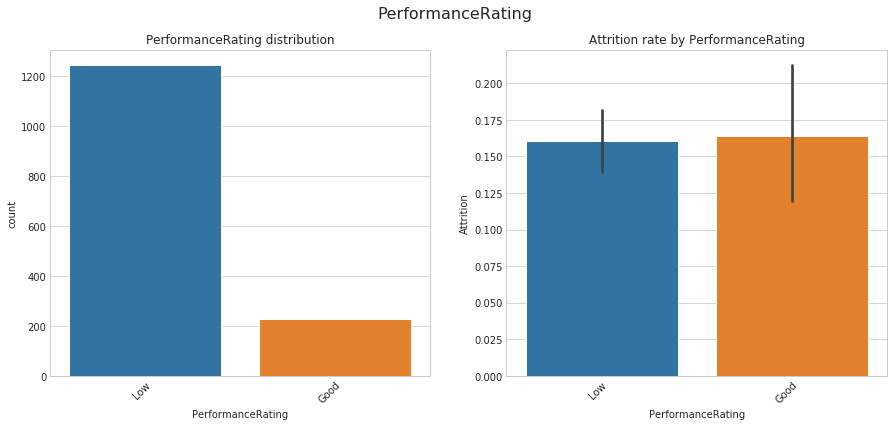

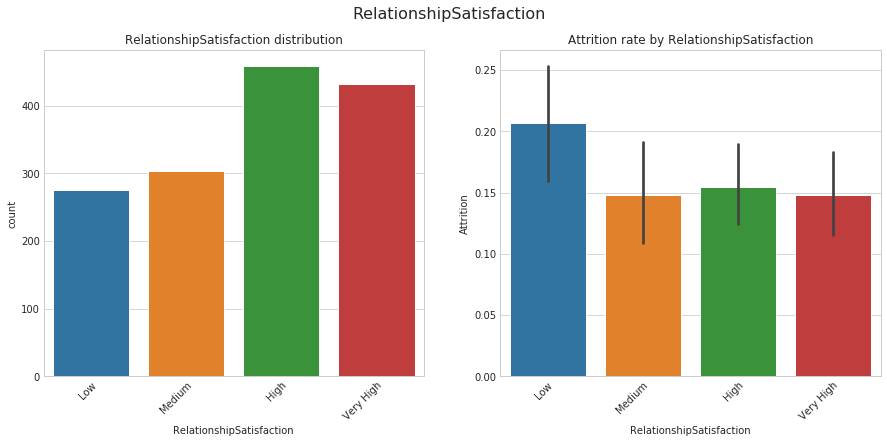

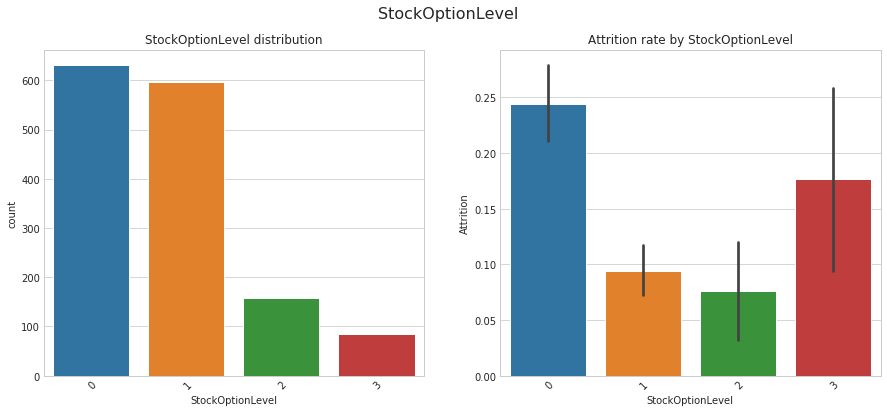

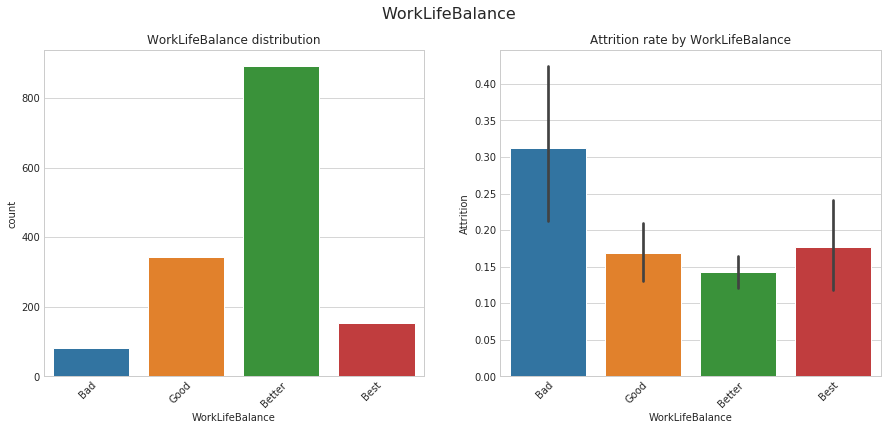

In [61]:
for col in (Categorical_without_order + Categorical_with_order):
    cat_distribution_target_proportion(col)

What we can see:
  -  `Attrition` higher if `BusinessTravel` is frequently
  -  `Department`, `Gender`, `Education` and `PerformanceRating` have low effect to `Attrition`
  -  `Attrition` higher if `MartialStatus` is Single
  -  Some `JobRole` (Sales Representative, Human Resources, Laboratory Technician) have a high level of `Attrition`
  -  `Attrition` is higher if an employee has `OverTime`
  -  If `EnvironmentSatisfaction`, `JobInvolvement`, `JobLevel`, `JobSatisfaction`, `RelationshipSatisfaction`, `WorkLifeBalance` is lower, then `Attrition` is higher

What about distribution and relationship with the target for numeric features?

In [69]:
def num_distribution_target_impact(column):
    fig , axes = plt.subplots(2,2,figsize = (15,6))
    fig.suptitle(column,fontsize=16)
    
    sns.distplot(dfIBM[column],kde=False,ax=axes[0])
    axes[0].set_title(column + ' distribution')
    
    sns.boxplot(x='Attrition',y=column,data=dfIBM,ax=axes[1])
    axes[1].set_title('Relationship Attrition with '+column)

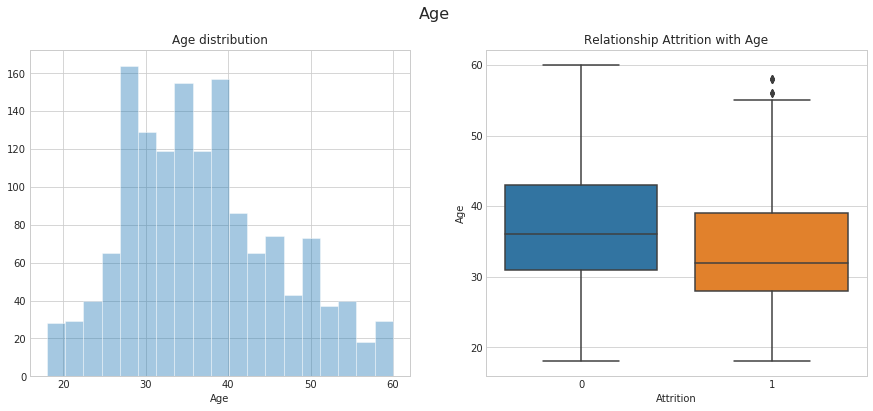

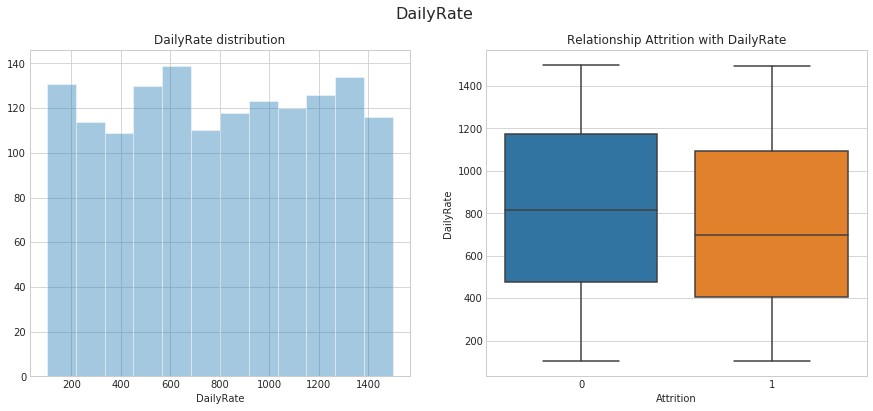

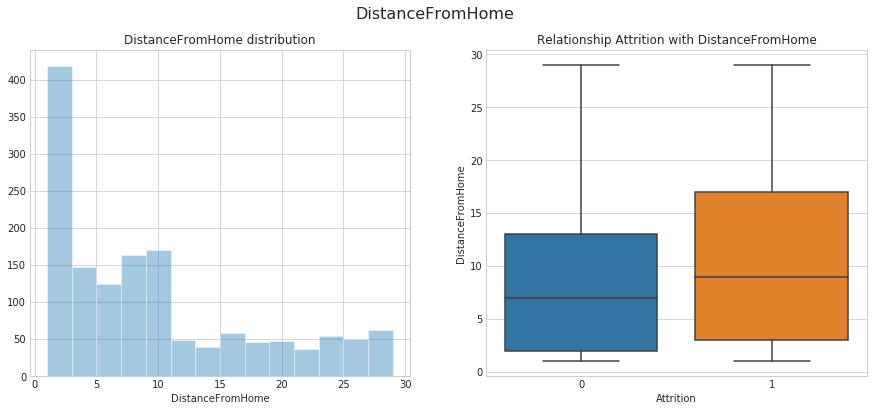

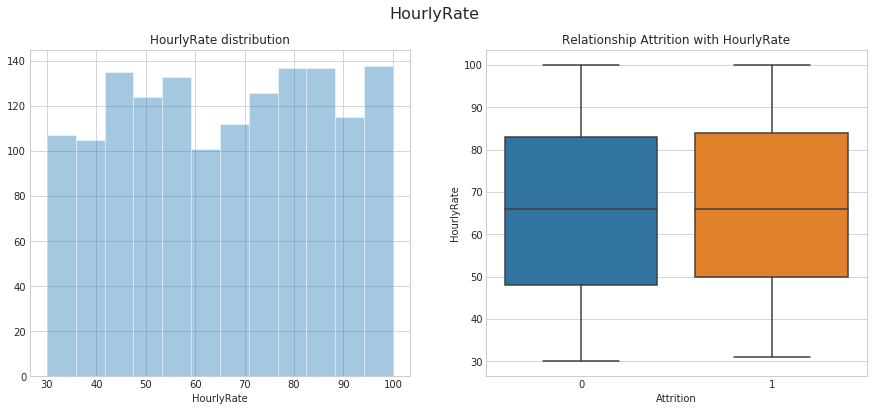

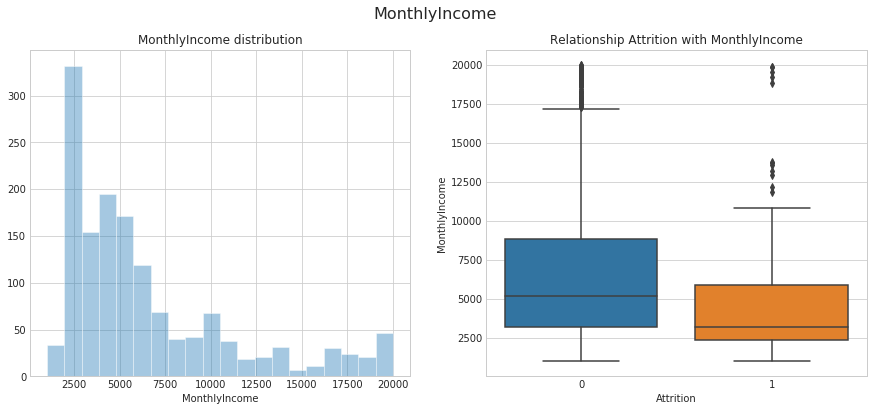

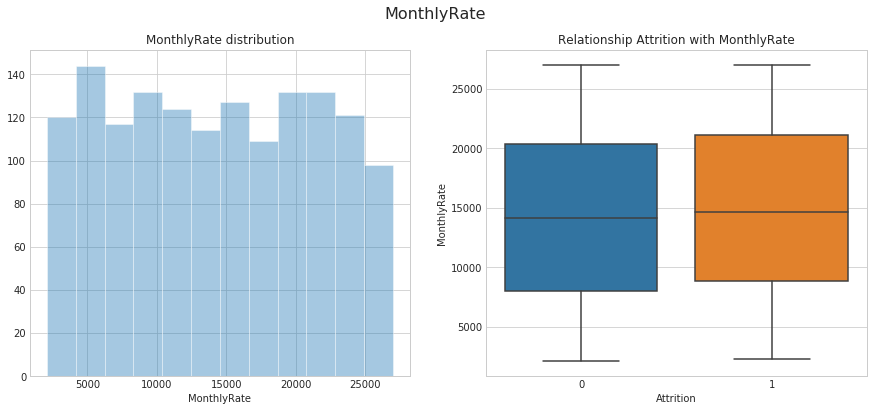

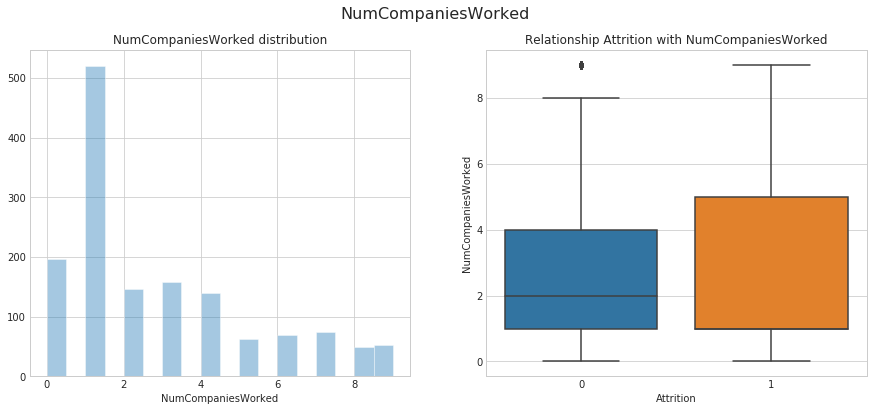

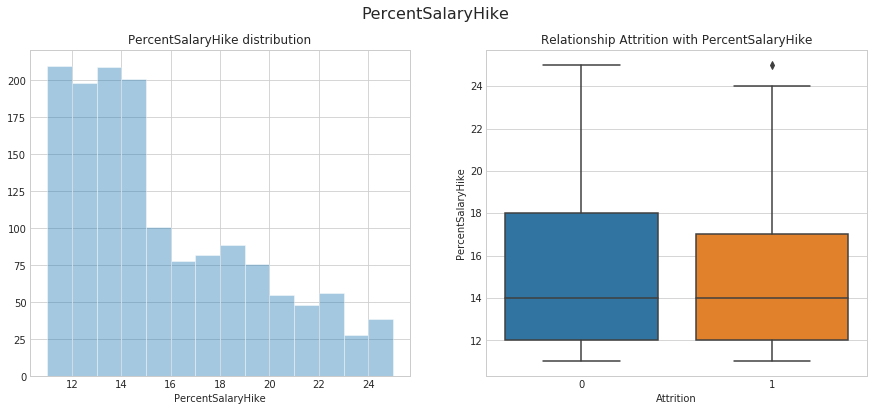

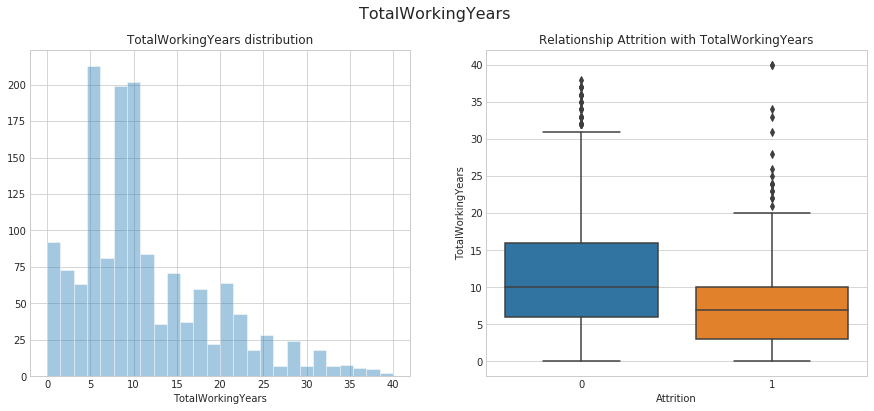

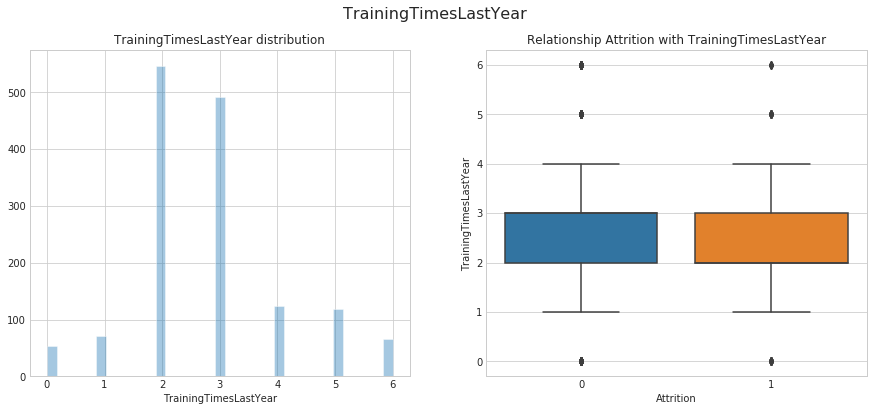

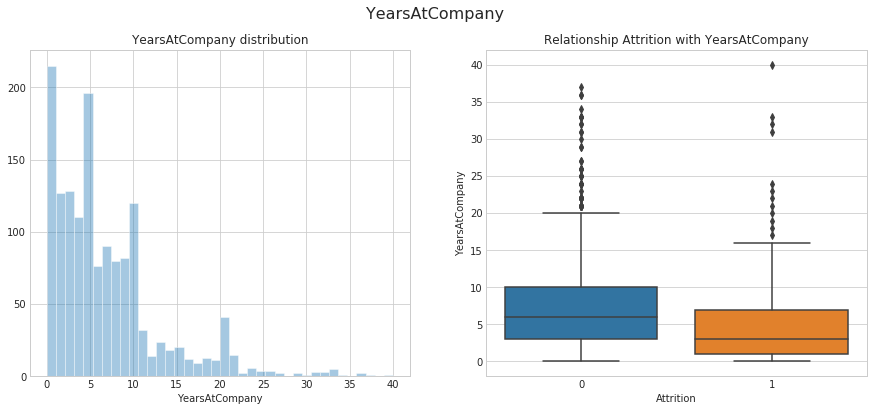

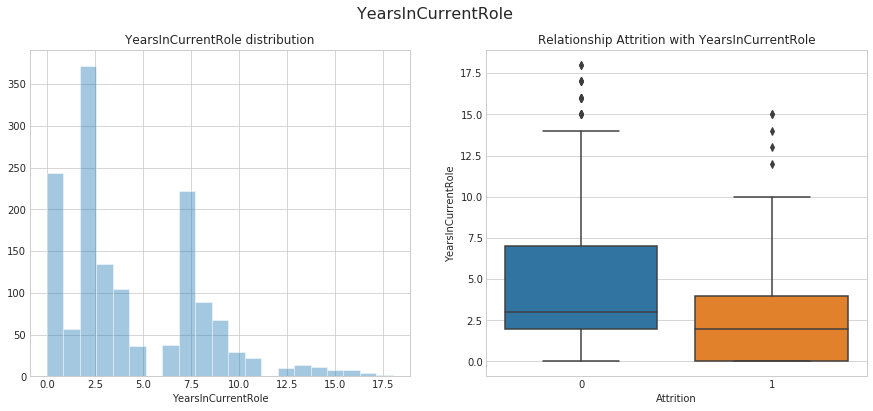

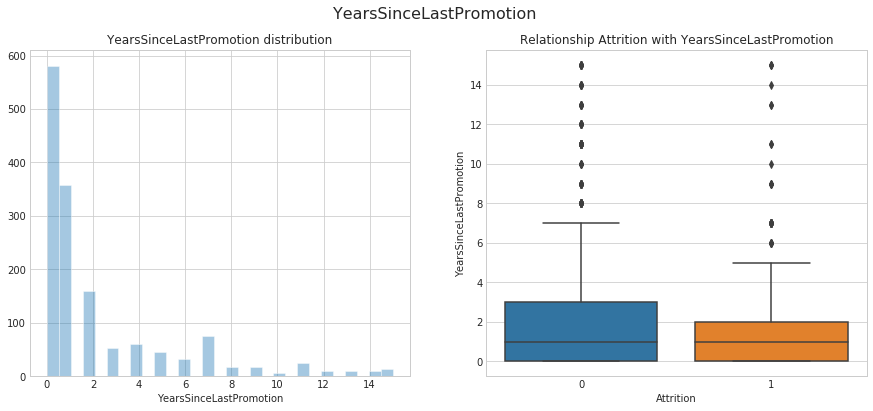

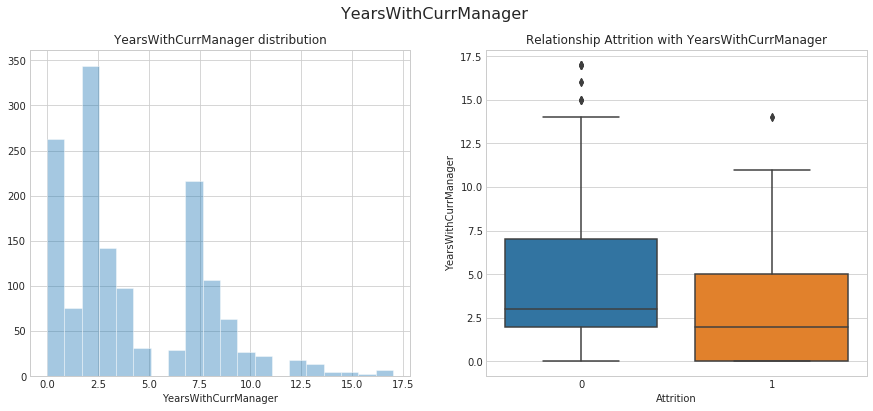

In [70]:
for n in Numeric:
    num_distribution_target_impact(n)

If the `Attrition` has occurred, we can see:
  -  Lower `Age`
  -  Lower `MonthlyIncome`
  -  Lower `TotalWorkingYears`
  -  Lower `YearsAtCompany`
  -  Lower `YearsInCurrentRole`
  -  Lower `YearsWithCurrManager`  

`DailyRate`, `DistanceFromHome`, `HourlyRate`, `MonthlyRate`, `NumCompaniesWorked`, `PercentSalaryHike`, `TrainigTimesLastYear`, `YearsSinceLastPromotion` have a low relationship with the `Attrition`.  

Let's see Pearson correlation matrix for all columns.

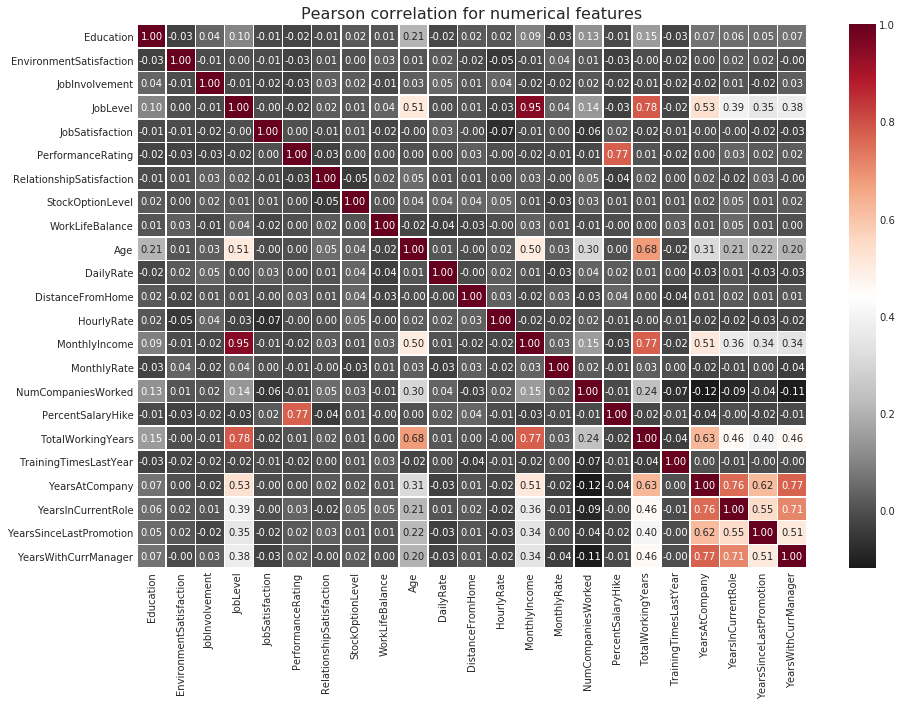

In [86]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(data=dfIBM[Categorical_with_order+Numeric].corr(),
            annot=True,fmt='.2f',linewidths=.5,cmap='RdGy_r');
plt.title('Pearson correlation for numerical features', fontsize=16);

We can see:
  -  High correlation between `JobLevel`, `MontlyIncome`, and `TotalWorkingYears`
  -  High correlation between `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, `YearsWithCurrManager`
  -  `PerfomanceRating` is correlate with `PercentSalaryHike`
  -  `Age` is correlate with `TotalWorkingYears`

For categorical features we want to check relationship between `MaritalStatus` and `BusinessTravel`, `OverTime`, `WorkLifeBalance` in relation to `Attrition`

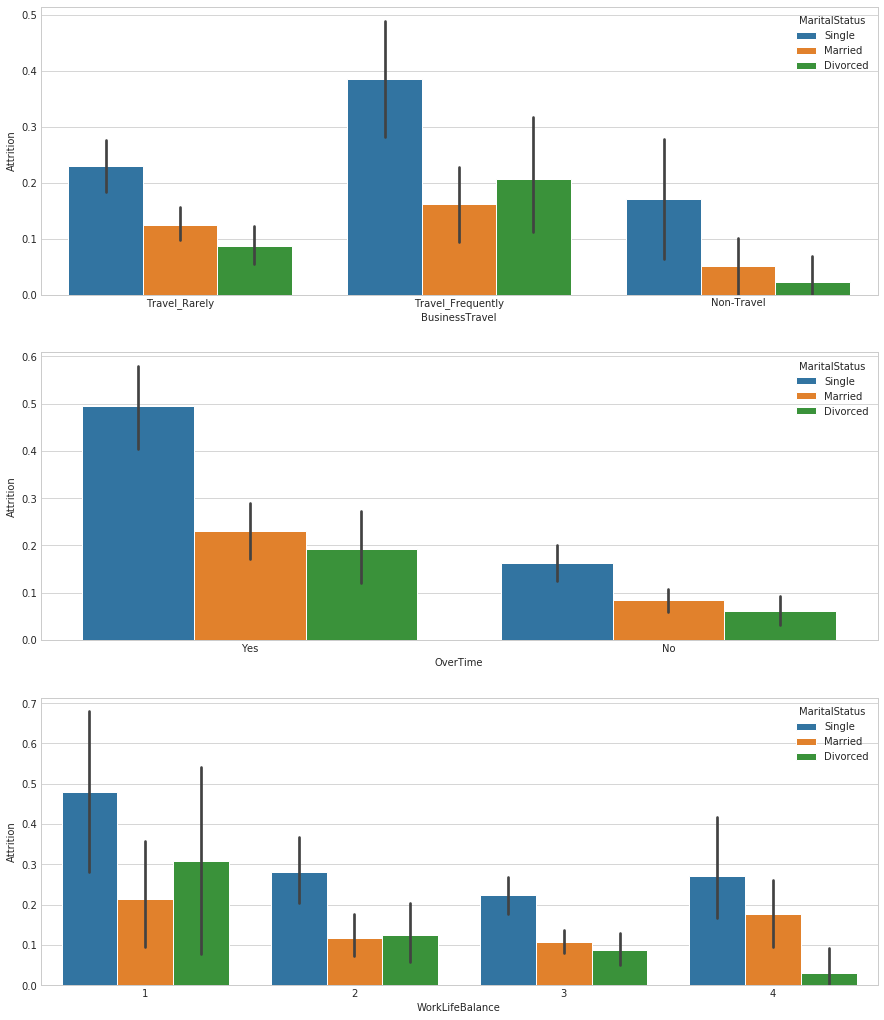

In [93]:
feat = ['BusinessTravel', 'OverTime', 'WorkLifeBalance']
fig , axes = plt.subplots(3,1,figsize = (15,18))
for i in range(len(feat)):
    sns.barplot(x=feat[i], y='Attrition', hue='MaritalStatus', data=dfIBM, ax=axes[i]);

Ok, our assumption about increasing influence of features `BusinessTravel`, `OverTime`, `WorkLifeBalance` to `Attrition` by `MartialStatus` is not confirmed

### 4. Insights and found dependencies

Here are all our observations about the influence of features to target.  
The Attrition has occured often, if:
  -  `BusinessTravel` is Frequently
  -  `MartialStatus` is Single
  -  `JobRole` is Sales Representative, Human Resources, Laboratory Technician
  -  `OverTime` is Yes
  -  `EnvironmentSatisfaction`, `JobInvolvement`, `JobLevel`, `JobSatisfaction`, `RelationshipSatisfaction`, `WorkLifeBalance` is lower
  -  `Age`, `MonthlyIncome`, `TotalWorkingYears`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsWithCurrManager` is lower  

We will check this when create our model. Also we will verify that other features have a low impact to target.  

We have some features with a high correlation with other:
  -  `JobLevel`, `MontlyIncome`, `TotalWorkingYears` and `Age`
  -  `PerfomanceRating` and `PercentSalaryHike`
  -  `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, `YearsWithCurrManager`  

We will either not include them in our train dataset for model (in case of LogisticRegression) or correct it by regularization.

### 5. Metrics selection

We have a task of a binary classification. There is an imbalance in the distribution of classes. So, we can't use an Accuracy.  
We can assume that in this task Recall is more important than Precision (we need to find all valuable employees want to get out), but a lot of false positive prediction is no good too (we need to uncover the factors that lead to employee attrition, with a lot of false positive prediction we make a mistake in choosing these factors).  
We will use a ROC-AUC since this metric is well in the case of class imbalance.

### 6. Model selection

We will try to use models:
  -  LogisticRegression
  -  RandomForestClassifier

These models are solving our problems: **binary classification** and identifying the **significance of features**.  
We will use LogisticRegression as a baseline model.  
We expect to get better results with Random Forest, given the presence of correlated features in our data, and possible nonlinear dependence target from features.  

### 7. Data preprocessing

For use Logistic Regression we need to convert our categorical features to dummies. But first, we need to convert our features, that have only 2 unique values. Let's do it.

In [290]:
dfIBM.Gender = dfIBM.Gender.map({'Male': 1, 'Female': 0})
dfIBM.OverTime = dfIBM.OverTime.map({'Yes': 1, 'No': 0})
Categorical_binary = ['Gender', 'OverTime']
Categorical_without_order = ['BusinessTravel', 'Department', 'EducationField',
                             'JobRole', 'MaritalStatus']

In [292]:
dfOHE = pd.get_dummies(dfIBM[Categorical_without_order])
Categorical_OHE = dfOHE.columns
dfIBMFull = pd.concat([dfIBM, dfOHE], axis=1)
# create target
y = dfIBMFull['Attrition']
dfIBMFull.drop(columns=['Attrition'], axis=1, inplace=True)
dfIBMFull.shape

(1470, 54)

Now, let's divide the data into training and hold-out sets. We have imbalance target class, so we need to stratified our separation by the target. We will use 15% of the data for the hold-out set because we have a very small dataset.

In [293]:
y.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(dfIBMFull, y,
                                                          test_size=0.15,
                                                          random_state=2018,
                                                          shuffle=True,
                                                          stratify=y)

In [295]:
y_train.value_counts(normalize=True)

0    0.839071
1    0.160929
Name: Attrition, dtype: float64

Now we can to scale all numerical features for use Logistic Regression.

In [296]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train[Categorical_with_order+Numeric]),
                          columns=Categorical_with_order+Numeric, index=X_train.index)
X_holdout_sc = pd.DataFrame(sc.transform(X_holdout[Categorical_with_order+Numeric]),
                            columns=Categorical_with_order+Numeric, index=X_holdout.index)

/home/galen/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/galen/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/galen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


### 8. Cross-validation and adjustment of model hyperparameters

Now we can split our train for Cross-validation. As in the case with the split to train and hold-out, we need to make a stratified split. We will use 5 Folds (still a very small data).

In [135]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

#### 8.1 Logistic Regression

In [323]:
X_train_LR = pd.concat([X_train_sc, X_train[list(Categorical_OHE)+list(Categorical_binary)]], axis=1)
X_train_LR.shape

(1249, 49)

In [324]:
X_holdout_LR = pd.concat([X_holdout_sc, X_holdout[list(Categorical_OHE)+list(Categorical_binary)]], axis=1)
X_holdout_LR.shape

(221, 49)

In [299]:
skf = StratifiedKFold(n_splits=5, random_state=2018, shuffle=True)

In [141]:
from sklearn.linear_model import LogisticRegression

Try to run Logistic Regression with defaults parameters.

Mean score = 0.8301485031870142


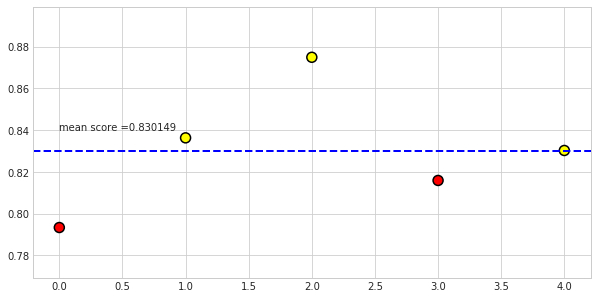

In [325]:
lr=LogisticRegression(random_state=2018)

cv_scores = cross_val_score(lr, X_train_LR, y_train, cv=skf, scoring='roc_auc', n_jobs=-1)

# Let's check variation in Folds
plt.rcParams['figure.figsize'] = (10,5)
plt.axhline(y=cv_scores.mean(), linewidth=2, color='b', linestyle='dashed');
plt.text(x=0, y=cv_scores.mean()+0.01, s='mean score ='+str(round(cv_scores.mean(),6)));
plt.scatter(range(5), cv_scores, s=100, c=(cv_scores>=cv_scores.mean()),
            edgecolor='k', cmap='autumn', linewidth=1.5);
print('Mean score =', cv_scores.mean())

Let's try to find beter regularization (it can be useful, accounting a multicollinearity). We will search regularization for both L2 (squares) and L1 (absolute) penalty.

In [326]:
penalty = ['l1', 'l2']
C = np.logspace(-1, 1, 10)
params = {'C': C, 'penalty': penalty}
cv_lr = GridSearchCV(lr, param_grid=params, cv=skf, scoring='roc_auc', n_jobs=-1)
cv_lr.fit(X_train_LR, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2018, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=2018, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([ 0.1    ,  0.16681,  0.27826,  0.46416,  0.77426,  1.29155,
        2.15443,  3.59381,  5.99484, 10.     ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [327]:
print('Best parameters:', cv_lr.best_params_)
print('Best score:', cv_lr.best_score_)

Best parameters: {'C': 1.291549665014884, 'penalty': 'l1'}
Best score: 0.8310180441837758


We can see results at the heatmap.

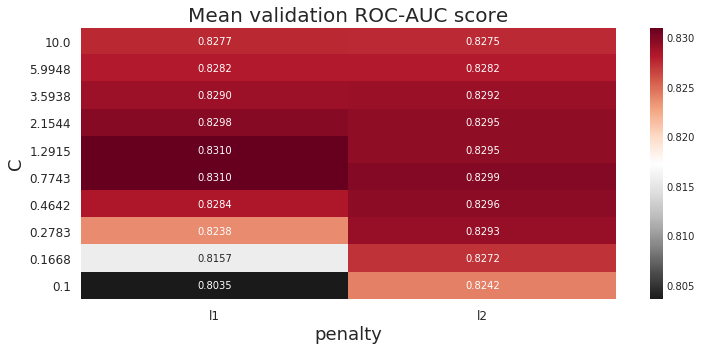

In [328]:
plt.rcParams['figure.figsize'] = (12,5)
sns.heatmap(pd.DataFrame(cv_lr.cv_results_['mean_test_score'].reshape(len(C),
                                                         len(penalty)),
                         index=np.round(C, 4),
                         columns=penalty).sort_index(ascending=False),
            annot=True, fmt='.4f', cmap='RdGy_r');
plt.yticks(rotation=0);
plt.xlabel('penalty', fontsize=18);
plt.ylabel('C', fontsize=18);
plt.title('Mean validation ROC-AUC score', fontsize=20);
plt.tick_params(axis='both', length=6, width=0, labelsize=12);

Ok, let's try to find the best regularization more precisely for both l2 and l1.

In [329]:
C = np.arange(0.1, 2.1, 0.1)
cv_scores = []
for c in C:
    lr=LogisticRegression(C=c, random_state=2018, penalty='l2')
    cv_scores.append(cross_val_score(lr, X_train_LR, y_train, cv=skf, scoring='roc_auc', n_jobs=-1))

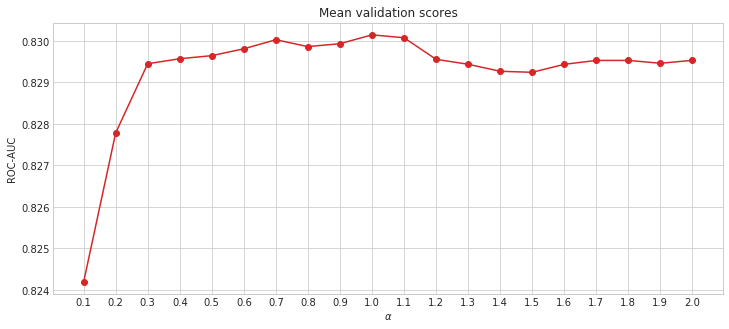

In [330]:
plt.plot(C, np.mean(cv_scores, axis=1), 'o-', color=color[6]);
plt.xticks(C);
plt.title('Mean validation scores');
plt.ylabel('ROC-AUC');
plt.xlabel(r'$\alpha$');

In [331]:
print('Best C for l2 = 1.0, Best score =', np.max(np.mean(cv_scores, axis=1)))

Best C for l2 = 1.0, Best score = 0.8301485031870142


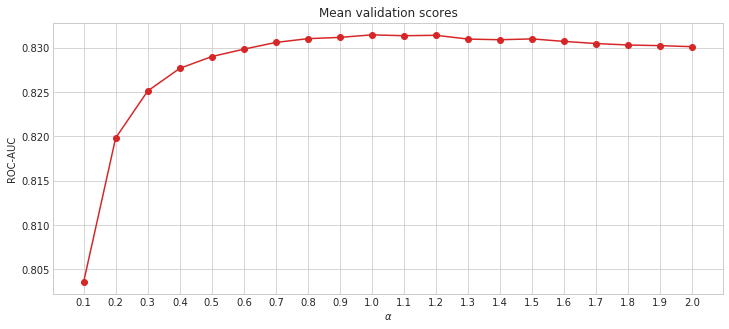

In [332]:
C = np.arange(0.1, 2.1, 0.1)
cv_scores = []
for c in C:
    lr=LogisticRegression(C=c, random_state=2018, penalty='l1')
    cv_scores.append(cross_val_score(lr, X_train_LR, y_train, cv=skf, scoring='roc_auc', n_jobs=-1))

plt.plot(C, np.mean(cv_scores, axis=1), 'o-', color=color[6]);
plt.xticks(C);
plt.title('Mean validation scores');
plt.ylabel('ROC-AUC');
plt.xlabel(r'$\alpha$');

In [333]:
print('Best C for l1 = 1.0, Best score =', np.max(np.mean(cv_scores, axis=1)))

Best C for l1 = 1.0, Best score = 0.8314482269976494


Let's get result for the hold-out set.

In [334]:
best_LR_validation = np.max(np.mean(cv_scores, axis=1))

In [335]:
from sklearn.metrics import roc_auc_score

lr=LogisticRegression(C=1, random_state=2018, penalty='l1')
lr.fit(X_train_LR, y_train)
y_pred = lr.predict_proba(X_holdout_LR)[:, 1]
LR_holdout_score = roc_auc_score(y_holdout, y_pred)
print('Hold-out score = ', LR_holdout_score)

Hold-out score =  0.837987987987988


Ok, there is no overfitting.  
Now will see at the model coefficients to understand the importance of features.

In [336]:
pd.DataFrame({'Name': X_train_LR.columns.values,
              'Coefficient': lr.coef_.flatten(),
              'Abs. Coefficient': np.abs(lr.coef_).
              flatten()}).sort_values(by='Abs. Coefficient', ascending=False)

,Name,Coefficient,Abs. Coefficient
48,OverTime,1.956799,1.956799
23,BusinessTravel_Non-Travel,-1.234837,1.234837
44,MaritalStatus_Divorced,-0.894827,0.894827
27,Department_Research & Development,-0.878684,0.878684
37,JobRole_Laboratory Technician,0.866572,0.866572
43,JobRole_Sales Representative,0.667827,0.667827
45,MaritalStatus_Married,-0.637944,0.637944
19,YearsAtCompany,0.615035,0.615035
22,YearsWithCurrManager,-0.504292,0.504292
15,NumCompaniesWorked,0.483210,0.483210


Some features are expected significant (`OverTime`, `BusinessTravel`,`YearsAtCompany` etc.), but some features are have the significance less than expected (`MonthlyIncome`, `Age`, etc.). So, it is probably due to multicollinearity in the data (there are many fetures with zero coefficients).  
Well, continue with Random Forest.

#### 8.2 Random Forest

In [337]:
X_train_RF = pd.concat([X_train_sc, X_train[list(Categorical_OHE)+list(Categorical_binary)]], axis=1)
X_train_RF.shape

(1249, 49)

In [338]:
X_holdout_RF = pd.concat([X_holdout_sc, X_holdout[list(Categorical_OHE)+list(Categorical_binary)]], axis=1)
X_holdout_RF.shape

(221, 49)

In [339]:
from sklearn.ensemble import RandomForestClassifier

Let's try Random Forest with default parameters.

Mean score = 0.7256602606849718


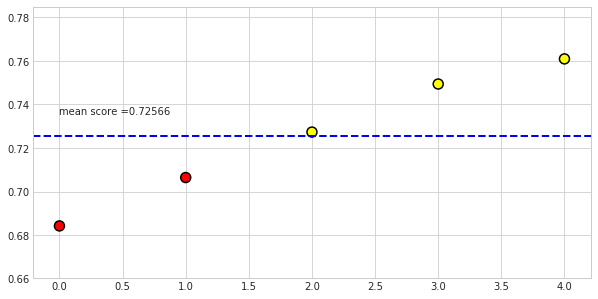

In [344]:
rf = RandomForestClassifier(random_state=2018)

cv_scores = cross_val_score(rf, X_train_RF, y_train, cv=skf, scoring='roc_auc', n_jobs=-1)

plt.rcParams['figure.figsize'] = (10,5)
plt.axhline(y=cv_scores.mean(), linewidth=2, color='b', linestyle='dashed');
plt.text(x=0, y=cv_scores.mean()+0.01, s='mean score ='+str(round(cv_scores.mean(),6)));
plt.scatter(range(5), cv_scores, s=100, c=(cv_scores>=cv_scores.mean()),
            edgecolor='k', cmap='autumn', linewidth=1.5);
print('Mean score =', cv_scores.mean())

Let's find beter parameters. We will check:
  -  n_estimators = 50-500, The number of trees in the forest
  -  max_depth = 2-20, The maximum depth of the tree
  -  max_features = 5-49, The number of features

In [346]:
%%time
n_estimators = np.arange(100, 600, 100)
max_depth = np.arange(2, 22, 4)
max_features = np.arange(10, 50, 10)
params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'max_features': max_features}
cv_rf = GridSearchCV(rf, param_grid=params, cv=skf, scoring='roc_auc', n_jobs=-1)
cv_rf.fit(X_train_RF, y_train)

CPU times: user 4.3 s, sys: 346 ms, total: 4.64 s
Wall time: 3min 57s


In [347]:
print('Best parameters:', cv_rf.best_params_)
print('Best score:', cv_rf.best_score_)

Best parameters: {'max_depth': 18, 'max_features': 10, 'n_estimators': 300}
Best score: 0.8085727755080824


Now we can find more precision parameters.

In [349]:
%%time
n_estimators = np.arange(250, 400, 50)
max_depth = np.arange(15, 26, 3)
max_features = np.arange(5, 21, 5)
params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'max_features': max_features}
cv_rf = GridSearchCV(rf, param_grid=params, cv=skf, scoring='roc_auc', n_jobs=-1)
cv_rf.fit(X_train_RF, y_train)

CPU times: user 2.54 s, sys: 239 ms, total: 2.78 s
Wall time: 1min 35s


In [350]:
print('Best parameters:', cv_rf.best_params_)
print('Best score:', cv_rf.best_score_)

Best parameters: {'max_depth': 18, 'max_features': 10, 'n_estimators': 300}
Best score: 0.8085727755080824


In [352]:
%%time
n_estimators = np.arange(280, 330, 10)
max_depth = np.arange(16, 25, 2)
max_features = np.arange(6, 14, 2)
params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'max_features': max_features}
cv_rf = GridSearchCV(rf, param_grid=params, cv=skf, scoring='roc_auc', n_jobs=-1)
cv_rf.fit(X_train_RF, y_train)

CPU times: user 4.12 s, sys: 197 ms, total: 4.31 s
Wall time: 2min 39s


In [353]:
print('Best parameters:', cv_rf.best_params_)
print('Best score:', cv_rf.best_score_)

Best parameters: {'max_depth': 20, 'max_features': 6, 'n_estimators': 280}
Best score: 0.8103121803023444


In [362]:
best_RF_validation = cv_rf.best_score_

The low value of the parameter max_features indicates the presence redundant features.

Let's get result for the hold-out set.

In [363]:
rf=RandomForestClassifier(random_state=2018, max_depth=20, max_features=6, n_estimators=280)
rf.fit(X_train_LR, y_train)
y_pred = rf.predict_proba(X_holdout_RF)[:, 1]
RF_holdout_score = roc_auc_score(y_holdout, y_pred)
print('Hold-out score = ', RF_holdout_score)

Hold-out score =  0.8123123123123123


Let's see features importances

In [365]:
pd.DataFrame({'Name': X_train_RF.columns.values,
              'Coefficient': rf.feature_importances_}).sort_values(by='Coefficient',
                                                                   ascending=False)

,Name,Coefficient
13,MonthlyIncome,0.071257
9,Age,0.058698
48,OverTime,0.054673
10,DailyRate,0.051166
14,MonthlyRate,0.047419
12,HourlyRate,0.046757
17,TotalWorkingYears,0.046390
11,DistanceFromHome,0.040163
19,YearsAtCompany,0.038544
16,PercentSalaryHike,0.035601


Now we have `MonthlyIncome`, `Age` and `OverTime` in the top!  
But `BusinessTravel` is dropped unexpectedly low.

### 9. Creation of new features and description of this process

Initially, we need to select important features and **remove unusable** features. We have small dataset and can use a full search. Let's use `SequentialFeatureSelector`.

In [402]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [403]:
X_train_LR = pd.concat([X_train_sc, X_train[list(Categorical_OHE)+list(Categorical_binary)]], axis=1)
X_train_LR.shape

(1249, 49)

In [415]:
X_holdout_LR = pd.concat([X_holdout_sc, X_holdout[list(Categorical_OHE)+list(Categorical_binary)]], axis=1)
X_holdout_LR.shape

(221, 49)

In [404]:
lrs = LogisticRegression(random_state=2018)

In [406]:
%%time
sfs1 = SFS(lrs, k_features='best', forward=True, floating=False, verbose=2,
           scoring='roc_auc', cv=5, n_jobs=-1)

sfs1 = sfs1.fit(X_train_LR, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  49 | elapsed:    3.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    3.6s finished

[2018-12-17 12:39:12] Features: 1/49 -- score: 0.6608135068825055[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  48 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.5s finished

[2018-12-17 12:39:13] Features: 2/49 -- score: 0.7299374642259753[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  47 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.5s finished

[2018-12-17 12:39:13] Features: 3/49 -- score: 0.7528796659053398[Parallel(n_jobs=-1)]: Using backend 

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished

[2018-12-17 12:39:33] Features: 35/49 -- score: 0.8400955076160468[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.5s finished

[2018-12-17 12:39:34] Features: 36/49 -- score: 0.839571686977977[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    1.0s finished

[2018-12-17 12:39:35] Features: 37/49 -- score: 0.8391239517863394[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out

CPU times: user 5.81 s, sys: 413 ms, total: 6.23 s
Wall time: 34.5 s


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished

[2018-12-17 12:39:43] Features: 48/49 -- score: 0.8314915587194148[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2018-12-17 12:39:43] Features: 49/49 -- score: 0.829961997565977

In [412]:
print('Best score: ', sfs1.k_score_)
print('Best features names: ', sfs1.k_feature_names_)

Best score:  0.8413308381819293
Best features names:  ('EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'EducationField_Human Resources', 'EducationField_Technical Degree', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Research Director', 'JobRole_Sales Representative', 'MaritalStatus_Single', 'Gender', 'OverTime')


We can see all our "favorite" columns in the final scope! The search seems to have gone well.

In [413]:
Best_features = list(sfs1.k_feature_names_)

In [416]:
X_train_B = X_train_LR[Best_features]
X_holdout_B = X_holdout_LR[Best_features]

Let's check results for our models with these features.

In [418]:
%%time
lr=LogisticRegression(random_state=2018, penalty='l1')
cv_scores = cross_val_score(lr, X_train_B, y_train, cv=skf, scoring='roc_auc', n_jobs=-1)
print('Mean score LR =', cv_scores.mean())

Mean score LR = 0.8426785505893337
CPU times: user 33.5 ms, sys: 8.53 ms, total: 42.1 ms
Wall time: 124 ms


In [419]:
%%time
rf = RandomForestClassifier(random_state=2018, max_depth=20, max_features=6, n_estimators=280)
cv_scores = cross_val_score(rf, X_train_B, y_train, cv=skf, scoring='roc_auc', n_jobs=-1)
print('Mean score RF =', cv_scores.mean())

Mean score RF = 0.8113205922233522
CPU times: user 36.4 ms, sys: 3.33 ms, total: 39.8 ms
Wall time: 1.5 s


Scores are increased for both models.

Let's try to create some features as the intersection of important features (All Satisfaction) and classes of numeric features, significant for target (we can see visualisations at p.3):
  -  Age <= ~33
  -  MonthlyInvome <= ~ 2600
  -  YearsWithCurrManager <= ~2
  -  YearsInCurrentRole <= ~2
  -  YearsAtCompany <= ~2

In [426]:
# All Level Satisfaction
X_train_B['FullSatisfaction'] = (X_train_B['EnvironmentSatisfaction']+
                                 X_train_B['JobInvolvement']+
                                 X_train_B['JobSatisfaction']+
                                 X_train_B['RelationshipSatisfaction']+
                                 X_train_B['WorkLifeBalance'])

X_holdout_B['FullSatisfaction'] = (X_holdout_B['EnvironmentSatisfaction']+
                                 X_holdout_B['JobInvolvement']+
                                 X_holdout_B['JobSatisfaction']+
                                 X_holdout_B['RelationshipSatisfaction']+
                                 X_holdout_B['WorkLifeBalance'])
sc = StandardScaler()
X_train_B['FullSatisfaction'] = sc.fit_transform(X_train_B[['FullSatisfaction']])
X_holdout_B['FullSatisfaction'] = sc.transform(X_holdout_B[['FullSatisfaction']])

In [436]:
# Age: Young <= 33 (-0.431717 after scaling)
X_train_B['Young'] = [1 if a<=-0.431717 else 0 for a in X_train_B['Age']]
X_holdout_B['Young'] = [1 if a<=-0.431717 else 0 for a in X_holdout_B['Age']]

In [444]:
# Income: Low <= 2650 (~-0.185819 after scaling)
X_train_B['LowIncome'] = [1 if a<=-0.185819 else 0 for a in X_train_B['MonthlyIncome']]
X_holdout_B['LowIncome'] = [1 if a<=-0.185819 else 0 for a in X_holdout_B['MonthlyIncome']]

In [452]:
# YearsWithCurrManager <= 2 (~-0.599076 after scaling)
X_train_B['LowYearsWithCurrManager'] = [1 if a<=-0.599076 else 0 for a in X_train_B['YearsWithCurrManager']]
X_holdout_B['LowYearsWithCurrManager'] = [1 if a<=-0.599076 else 0 for a in X_holdout_B['YearsWithCurrManager']]

In [453]:
# YearsInCurrentRole <= 2 (~-0.616905 after scaling)
X_train_B['LowYearsInCurrentRole'] = [1 if a<=-0.616905 else 0 for a in X_train_B['YearsInCurrentRole']]
X_holdout_B['LowYearsInCurrentRole'] = [1 if a<=-0.616905 else 0 for a in X_holdout_B['YearsInCurrentRole']]

In [454]:
# YearsAtCompany <= 2 (~-0.818114 after scaling)
X_train_B['LowYearsAtCompany'] = [1 if a<=-0.818114 else 0 for a in X_train_B['YearsAtCompany']]
X_holdout_B['LowYearsAtCompany'] = [1 if a<=-0.818114 else 0 for a in X_holdout_B['YearsAtCompany']]

Let's try our model

In [455]:
%%time
lr=LogisticRegression(random_state=2018, penalty='l1')
cv_scores = cross_val_score(lr, X_train_B, y_train, cv=skf, scoring='roc_auc', n_jobs=-1)
print('Mean score LR =', cv_scores.mean())

Mean score LR = 0.8457463170120423
CPU times: user 62.9 ms, sys: 99 ms, total: 162 ms
Wall time: 2.83 s


The result is increased!

### 10. Plotting training and validation curves

In [456]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

Let's create validation curve for Logistic Regression model. Repeat selection of the regularization coefficient.

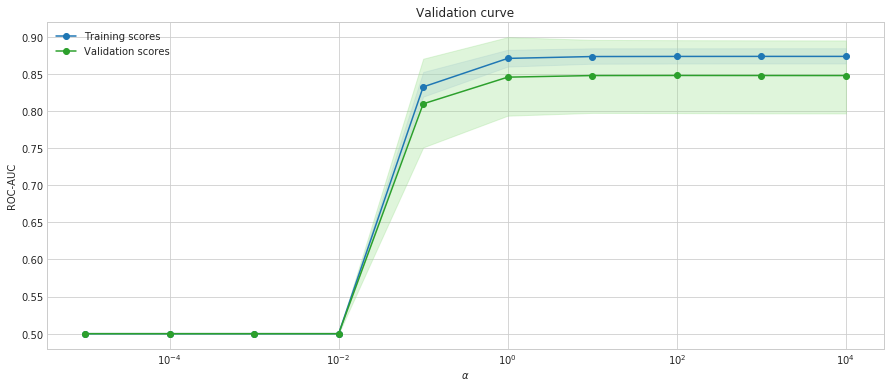

In [464]:
plt.rcParams['figure.figsize'] = (15,6)
C = np.logspace(-5, 4, 10)
train_sc, valid_sc = validation_curve(lr, X_train_B, y_train,
                                      'C', C, cv=skf, scoring='roc_auc')

plt.plot(C, np.mean(train_sc, axis=1), 'o-', color=color[0], label='Training scores');
plt.fill_between(C, np.max(train_sc, axis=1),
                 np.min(train_sc, axis=1), alpha=0.3, color=color[1]);
plt.plot(C, np.mean(valid_sc, axis=1), 'o-', color=color[4], label='Validation scores');
plt.fill_between(C, np.max(valid_sc, axis=1),
                 np.min(valid_sc, axis=1), alpha=0.3, color=color[5]);
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('ROC-AUC')
plt.title('Validation curve')
plt.legend()
plt.show()

In [471]:
print('Bect C = ', C[(np.mean(valid_sc, axis=1)).argmax()])
print('Best score = ', np.max((np.mean(valid_sc, axis=1))))

Bect C =  100.0
Best score =  0.8480183690934655


We have training and validation curves close to each other, so our model is underfitting, it is not complex enough.  
Let's create learning curve using C=100.

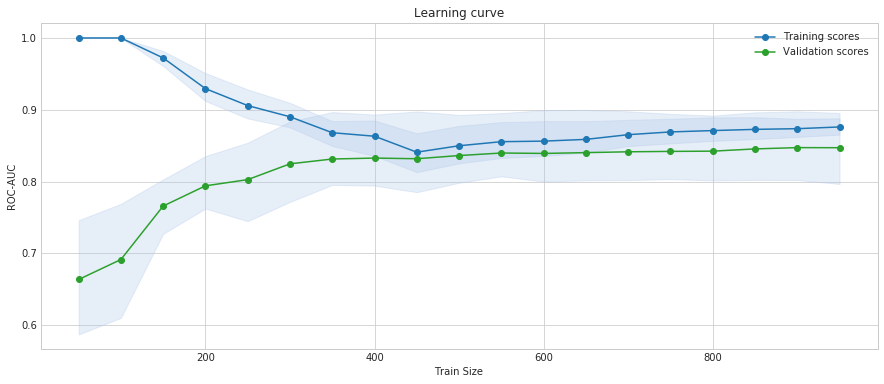

In [474]:
lr=LogisticRegression(C=100, random_state=2018, penalty='l1')

train_sizes, train_sc, valid_sc = learning_curve(lr, X_train_B, y_train,
                                                 train_sizes=np.arange(50, 998, 50),
                                                 scoring='roc_auc', cv=skf)

plt.plot(train_sizes, np.mean(train_sc, axis=1), 'o-', color=color[0], label='Training scores');
plt.fill_between(train_sizes, np.max(train_sc, axis=1),
                 np.min(train_sc, axis=1), alpha=0.3, color=color[1]);
plt.plot(train_sizes, np.mean(valid_sc, axis=1), 'o-', color=color[4], label='Validation scores');
plt.fill_between(train_sizes, np.max(valid_sc, axis=1),
                np.min(valid_sc, axis=1), alpha=0.3, color=color[1]);
plt.xlabel('Train Size')
plt.ylabel('ROC-AUC')
plt.title('Learning curve')
plt.legend()
plt.show()

As we can see, an approximation of curves is stopped after 400 rows of the data. More data not make out model better, only change parameters and adding new features.

Now we will create curves for Random Forest. We will search value fot parameter `max_features`.

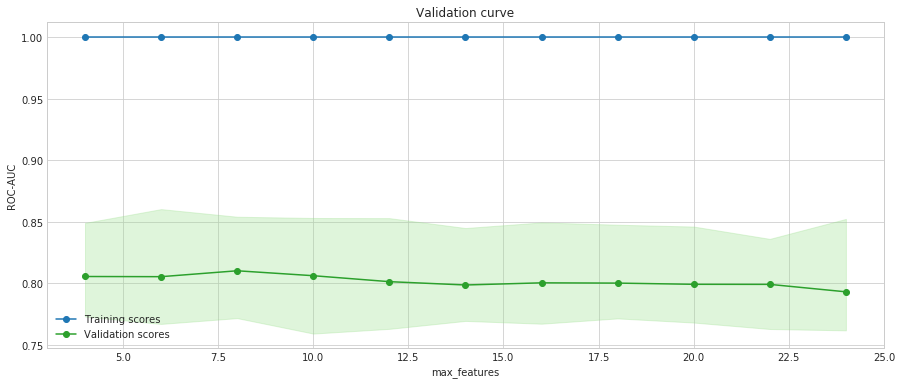

In [477]:
plt.rcParams['figure.figsize'] = (15,6)
rf = RandomForestClassifier(random_state=2018, max_depth=20, n_estimators=300)
max_features = np.arange(4, 26, 2)
train_sc, valid_sc = validation_curve(rf, X_train_B, y_train,
                                      'max_features', max_features, cv=skf, scoring='roc_auc')

plt.plot(max_features, np.mean(train_sc, axis=1), 'o-', color=color[0], label='Training scores');
plt.fill_between(max_features, np.max(train_sc, axis=1),
                 np.min(train_sc, axis=1), alpha=0.3, color=color[1]);
plt.plot(max_features, np.mean(valid_sc, axis=1), 'o-', color=color[4], label='Validation scores');
plt.fill_between(max_features, np.max(valid_sc, axis=1),
                 np.min(valid_sc, axis=1), alpha=0.3, color=color[5]);
plt.xlabel('max_features')
plt.ylabel('ROC-AUC')
plt.title('Validation curve')
plt.legend()
plt.show()

In [479]:
print('Best max_features = ', max_features[(np.mean(valid_sc, axis=1)).argmax()])
print('Best score = ', np.max((np.mean(valid_sc, axis=1))))

Best max_features =  8
Best score =  0.8103121564998972


The Validation score is almost identical for all values of max_features. We need to change other parameters for get a significant improvement. Due to new set of features, we can find parameters `max_depth` and `n_estimators` again.  

In [483]:
%%time
rf = RandomForestClassifier(random_state=2018)
n_estimators = np.arange(100, 600, 100)
max_depth = np.arange(4, 25, 4)
max_features = np.arange(8, 30, 4)
params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'max_features': max_features}
cv_rf = GridSearchCV(rf, param_grid=params, cv=skf, scoring='roc_auc', n_jobs=-1)
cv_rf.fit(X_train_RF, y_train)
print('Best parameters:', cv_rf.best_params_)
print('Best score:', cv_rf.best_score_)

Best parameters: {'max_depth': 8, 'max_features': 8, 'n_estimators': 200}
Best score: 0.8164620487102605
CPU times: user 7.02 s, sys: 430 ms, total: 7.45 s
Wall time: 7min 28s


We will use received values in creating learning curve.

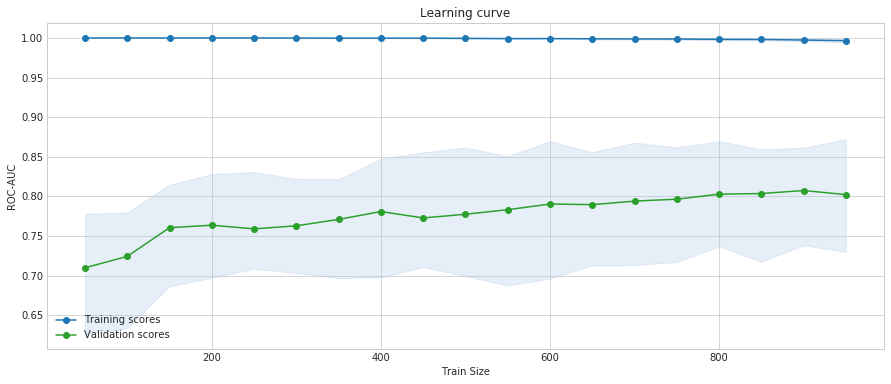

In [484]:
rf = RandomForestClassifier(random_state=2018, max_depth=8, max_features=8, n_estimators=200)

train_sizes, train_sc, valid_sc = learning_curve(rf, X_train_B, y_train,
                                                 train_sizes=np.arange(50, 998, 50),
                                                 scoring='roc_auc', cv=skf)

plt.plot(train_sizes, np.mean(train_sc, axis=1), 'o-', color=color[0], label='Training scores');
plt.fill_between(train_sizes, np.max(train_sc, axis=1),
                 np.min(train_sc, axis=1), alpha=0.3, color=color[1]);
plt.plot(train_sizes, np.mean(valid_sc, axis=1), 'o-', color=color[4], label='Validation scores');
plt.fill_between(train_sizes, np.max(valid_sc, axis=1),
                np.min(valid_sc, axis=1), alpha=0.3, color=color[1]);
plt.xlabel('Train Size')
plt.ylabel('ROC-AUC')
plt.title('Learning curve')
plt.legend()
plt.show()

The convergence of these curves is not over, it may help to increase the dataset.

### 11. Prediction for test or hold-out samples

Let's make a prediction on the hold-out set for Logistic Regression model.

In [481]:
lr=LogisticRegression(C=100, random_state=2018, penalty='l1')
lr.fit(X_train_B, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=2018, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [482]:
y_pred_lr = lr.predict_proba(X_holdout_B)[:, 1]
LR_holdout_score = roc_auc_score(y_holdout, y_pred_lr)
print('Hold-out score = ', LR_holdout_score)

Hold-out score =  0.8358858858858859


The result on cross-calidation is capmarable and is about *0.848*.  

Let's make a prediction on the hold-out set for Fandom Forest model.

In [485]:
rf = RandomForestClassifier(random_state=2018, max_depth=8, max_features=8, n_estimators=200)
rf.fit(X_train_B, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [486]:
y_pred_rf = rf.predict_proba(X_holdout_B)[:, 1]
RF_holdout_score = roc_auc_score(y_holdout, y_pred_rf)
print('Hold-out score = ', RF_holdout_score)

Hold-out score =  0.8393393393393395


Finally, the result of Random Forest model on hold-out set is slightly better than Logistic Regression result!  
Let's see at feature importance in both models.

In [487]:
pd.DataFrame({'Name': X_train_B.columns.values,
              'Coefficient': lr.coef_.flatten(),
              'Abs. Coefficient': np.abs(lr.coef_).
              flatten()}).sort_values(by='Abs. Coefficient', ascending=False)

,Name,Coefficient,Abs. Coefficient
13,BusinessTravel_Non-Travel,-3.211166,3.211166
15,BusinessTravel_Travel_Rarely,-2.284800,2.284800
25,OverTime,2.132691,2.132691
14,BusinessTravel_Travel_Frequently,-1.439672,1.439672
23,MaritalStatus_Single,1.080038,1.080038
20,JobRole_Manager,-1.075928,1.075928
16,Department_Research & Development,-1.005417,1.005417
18,EducationField_Technical Degree,0.967714,0.967714
19,JobRole_Laboratory Technician,0.956493,0.956493
17,EducationField_Human Resources,0.943514,0.943514


In [489]:
pd.DataFrame({'Name': X_train_B.columns.values,
              'Coefficient': rf.feature_importances_}).sort_values(by='Coefficient',
                                                                   ascending=False)

,Name,Coefficient
26,FullSatisfaction,0.124859
7,MonthlyIncome,0.118093
25,OverTime,0.092641
5,Age,0.084872
6,DistanceFromHome,0.055450
9,YearsAtCompany,0.053393
8,NumCompaniesWorked,0.042530
23,MaritalStatus_Single,0.034740
0,EnvironmentSatisfaction,0.033619
12,YearsWithCurrManager,0.033506


There are some features in top of both models (`Overtime`, `MartialStatus_Signed`) but for most features the estimate of importance is strongly different.

### 12. Conclusions

In Exploratory Data Analysis we examine a structure of the date: count and type of features, target feature and it's relationship with other variables. During a brief review of the relationship of variables, we find some insight and relationship with target description. Some of our suspicions were confirmed while working with prediction models.  
We get the result of the model: ROC AUC about 0.84.  
HR can use our model to prediction of a possible outflow of valuable employees. But at the moment it doesn't really matter.  
We get few features (as `OverTime`, `BusinessTravel`, `MonthlyIncoming`), which have a significant impact on employee attrition. If companies will pay attention to this, they will more reliably protect the safety of their most important asset - people.  
To improve the quality of the model:
  -  We need more not fictional data
  -  Review other models such as SVM and neural networks
  -  Find other patterns in the data  